# Homework 3

The maximum score of this homework is 100+20 points. Grading is listed in this table:

| Grade | Score range |
| --- | --- |
| 5 | 85+ |
| 4 | 70-84 |
| 3 | 55-69 |
| 2 | 40-54 |
| 1 | 0-39 |

Most exercises include tests which should pass if your solution is correct.
However, successful tests do not guarantee that your solution is correct.
You are free to add more tests.

## Deadline

Monday, 11 December 2017, 23:59

## Boilerplate

Feel free to copy any boilerplate code you need from labs [9](../../course_material/09_Morphology_lab/09_Morphology_lab.ipynb#Morphology) and [10](../../course_material/10_Syntax/10_Syntax_lab.ipynb#Boilerplate).

# Exercise 1: Morphology (45 points)


## 1.1 Extend the lexc grammar (20 points)

This exercise assumes that you have finished the lexc lab exercises. The grammar you hand in have to handle the adjectives listed in the lab exercises, as well as the number (singular / plural), the nominative and accusative cases, comparative and superlative forms, and vowel harmony.

There are two sub-tasks to this exercise. You can download them from
1. http://sandbox.mokk.bme.hu/~ndavid/homework3/{neptun_code}/homework3_1_1_1.ipynb
1. http://sandbox.mokk.bme.hu/~ndavid/homework3/{neptun_code}/homework3_1_1_2.ipynb

Please don't solve the exercises in the downloaded notebooks, but copy the descriptions and starter code snippets to the cells below.

### 1.1.1  (12 points)

### 1.1.2  (8 points)

## 1.2 CFG morphology (25 points)

### 1.2.1 The basics (15 points)

Implement morphological analysis with a CFG grammar. Requirements:
- the grammar should handle everything we covered in the lab, except for vowel harmony
- there is no need to handle generation; concentrate on parsing
- it doesn't matter what the intermediate nonterminals are called. However, _preterminals_ should be valid morphological tags. See an example below.
- encapsulate the functionality in a `CFGMorphParser` class:
    - its `__init__()` should accept no parameters (or at least provide defaults)
    - it should have a `parse_tree()` method, which accepts a word and returns the parse tree
    - it should have a `parse()` method, which accepts a word and returns the morphological parse _in the same form as HFST_. Refer to `hfst_lookup` and the tests for the format. `nltk.tree.Tree.pos()` is a good starting point

Note that having the same format as HFST doesn't mean you have to return the exact same output: for instance, we defined _terhes_ as a genuine adjective, even though it is derived from the noun _teher_. So HFST would analyze it as `teher[/N]es[_Adjz:s/Adj][Nom]`, but you only need to return `terhes[/Adj]`. You **also don't have to cover [Nom]**, because of [this bug](https://github.com/nltk/nltk/issues/1890).

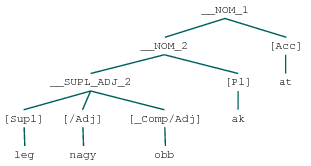

In [1]:
import nltk
from nltk.tree import Tree

tree = Tree('__NOM_1', [
    Tree('__NOM_2', [
        Tree('__SUPL_ADJ_2', [
            Tree('[Supl]', ['leg']),
            Tree('[/Adj]', ['nagy']),
            Tree('[_Comp/Adj]', ['obb']),
        ]),
        Tree('[Pl]', ['ak']),
    ]),
    Tree('[Acc]', ['at']),
])

display(tree)
# If display() doesn't work, try this
# tree.pretty_print()

In [ ]:
# Your implementation here

# Tests
parser = CFGMorphParser()

assert parser.parse('unknown_word') is None
assert parser.parse('terhes') == 'terhes[/Adj]'
assert parser.parse('csendesebbet') == 'csendes[/Adj]ebb[_Comp/Adj]et[Acc]'
assert parser.parse('legfinomabbak') == 'leg[/Supl]finom[/Adj]abb[_Comp/Adj]ak[Pl]'
# It's OK here
assert parser.parse('legfinomabbek') == 'leg[/Supl]finom[/Adj]abb[_Comp/Adj]ek[Pl]'

### 1.2.2 Vowel harmony (10 points)

Also handle vowel harmony. Write a function that traverses the tree manually (similarly to [exercise 2.4 in the lab](../../course_material/10_Syntax/10_Syntax_lab_solutions.ipynb#2.4-Evaluation*)) and returns `True` or `False`, depending on whether the tree conforms to vowel harmony rules. Use this function in `parse_tree` (and `parse`) to filter invalid trees.

In [ ]:
# Tests
assert parser.parse('legfinomabbak') == 'leg[/Supl]finom[/Adj]abb[_Comp/Adj]ak[Pl]'
assert parser.parse('legfinomabbek') == None

# Exercise 2: Syntax (55 points)

In this exercise, you will parse a treebank, and induce a PCFG grammar from it. You will then implement a probabilistic version of the CKY algorithm, and evaluate the grammar on the test split of the treebank.

## 2.1 Parse a treebank (10 points)

Parse the treebank file `en_lines-ud-train.s` in the notebook's directory. Write a **generator** function that reads the file and yields `nltk.tree.Tree` objects. In particular,
- do not read the whole file into memory
- the `Tree.fromstring()` function converts an s-expression into a tree

Open the file in an editor to see the formatting.

Note that the file was created by parsing the [LinES dependency corpus](https://github.com/UniversalDependencies/UD_English-LinES/tree/master) with [Stanford CoreNLP](https://stanfordnlp.github.io/CoreNLP/), so it is not a gold standard by any means, but it will suffice for now.

In [ ]:
from nltk.tree import Tree

def parse_treebank(treebank_file):
    pass

# Tests
assert sum(1 for _ in parse_treebank('en_lines-ud-train.s')) == 2613
assert isinstance(next(parse_treebank('en_lines-ud-train.s')), Tree)

## 2.2 Filter trees (5 points)

In order to avoid problems further down the line, we shall only handle a subset of the trees in the treebank. We call a tree _valid_, if
- its root is `'S'`
- the root has at least two children.

Write a function that returns `True` for "valid" trees and `False` for invalid ones. Filter the your generator with it.

In [ ]:
def is_tree_valid(tree):
    pass

# Tests
assert sum(map(is_tree_valid, parse_treebank('en_lines-ud-train.s'))) == 2311

## 2.3 Induce the PCFG grammar (10 points)

Now that you have the trees, it is time to induce (train) a PCFG grammar for it! Luckily, `nltk` has a functions for just that: [`nltk.grammar.induce_pcfg`](http://www.nltk.org/api/nltk.html#nltk.grammar.induce_pcfg). Use it to acquire your PCFG grammar. You can find hints at how to use it in the [grammar module](http://www.nltk.org/_modules/nltk/grammar.html).

Note: since we want to parse sentences with the PCKY algorithm, we need our grammar to be in CNF. Unfortunately, `nlkt` cannot convert a grammar to CNF, so you have to ensure that the trees are in CNF before feeding them to the PCFG induction function. That way, we can be sure that our grammar will be also. There are two functions that ensure a tree is in CNF:
- [`collapse_unary`](http://www.nltk.org/api/nltk.html#nltk.tree.Tree.collapse_unary). Make sure you call it with `collapsePOS=True`!
- [`chomsky_normal_form`](http://www.nltk.org/api/nltk.html#nltk.tree.Tree.chomsky_normal_form). Do not use any smoothing.

In [ ]:
def train_grammar(trees):
    pass
        
def is_grammar_cnf(grammar):
    for prod in grammar.productions():
        rhs = prod.rhs()
        if len(rhs) > 2 or (len(rhs) == 1 and isinstance(rhs[0], nltk.Nonterminal)):
            return False
    return True

# Tests
grammar = train_grammar(filter(is_tree_valid, parse_treebank('en_lines-ud-train.s')))
assert len(grammar.productions()) == 15000
assert is_grammar_cnf(grammar)

## 2.4 Implement PCKY (15 points)

Implement the PCKY algorithm. Encapsulate it in a class called `PCKYParser`. Extend your `CKYParser` solution from the lab so that it creates trees with probabilities (`ProbabilisticTree`). The `parse()` method should also accept a parameter `n`, and only return the most probable `n` trees (as a generator).

Some pointers:
- [ProbabilisticTree](http://www.nltk.org/api/nltk.html#nltk.tree.ProbabilisticTree), which inherits from
- [ProbabilisticMixIn](http://www.nltk.org/api/nltk.html#nltk.probability.ProbabilisticMixIn)

## 2.5 Evaluate the grammar (15 points)

Evaluate your grammar on the test split of the treebank (`en_lines-ud-dev.s`). Implement the **unlabelled** PARSEVAL metric. See [the first answer for an example](https://linguistics.stackexchange.com/questions/1873/is-there-a-well-established-metric-to-measure-the-effectiveness-of-a-parsing-alg).

# Exercise 3: Bonus* (20 points)

Implement a class that converts Python-style regular expressions to XSLT-style ones, and executes them via foma.

## 3.1 Conversion* (10 points)

The functionality should be encapsulated in a class called `FomaRegex`. The public API specification is as follows:
- its constructor should accept a valid Python regex string (not a [regex object](https://docs.python.org/3/library/re.html#regular-expression-objects)), convert it to the XFST format and store it in its `pattern` member field
- it should have a `convert` static method that does the pattern conversion. You can use pure Python or better yet, a CFG grammar
- the class should implement the context manager protocol:
    - when entering the context, an FSA file should be created via foma and its name stored in the `fsa_file` field.  The `read regex <regex>` command can be used to compile a regex in foma
    - after the context closes, the FSA file should be deleted and the `fsa_file` member set to `None`

You only need to account for the first six rows in [the table comparing the two syntaxes](../../course_material/08_Morphology/08_Morphology_lecture.ipynb#XFST-vs-Python-regular-expressions). Additionally, you only need to cover the characters a-zA-Z0-9 (i.e. no punctuation). Note that there are two options for verbatim texts in XFST: `[a b c]` or `{abc}`. You are encouraged to use the latter; should you choose to use the former, update the assert statements accordingly.

You don't have to worry about applying the regex at this point.

In [ ]:
import os

class FomaRegex:
    pass

# Tests
assert FomaRegex.convert('ab?c*d+') == '{a}{b}^<2{c}*{d}+'
assert FomaRegex.convert('a.b') == '{a}?{b}'
assert FomaRegex.convert('a+(bc|de).*') == '{a}+[{bc}|{de}]?*'

with FomaRegex('a.b') as fr:
    assert fr.pattern == '{a}?{b}', 'Invalid pattern'
    assert fr.fsa_file is not None, 'FSA file is None in with'
    fsa_file = fr.fsa_file
assert fr.fsa_file is None, 'FSA file is not None after with'
assert not os.path.isfile(fsa_file), 'FSA file still exists after with'

## 3.2 Application* (5 points)

Add a `match` method to the class that runs the regex against the specified string. It should return `True` or `False` depending on whether the regex matched the string.

Note: obviously you should use your FSA file and foma, not the `re` module. :)

In [ ]:
# Tests
with FomaRegex('a*(bc|de).+') as fr:
    assert fr.match('aabcd') is True
    assert fr.match('ade') is False

## 3.3 Multiple regexes (5 points)

Make sure not all `FomaRegex` objects use the same FSA file.

In [ ]:
# Tests
with FomaRegex('a') as a, FomaRegex('b') as b:
    assert a.fsa_file != b.fsa_file